In [2]:
pip install pandas


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Predicting House Sale Prices Using Regression

📌 Project Goal:
Build models to predict house prices (SalePrice) from features like:

Lot area

Year built

Overall quality

Number of bedrooms

Garage area

Exterior materials

Neighborhood

And more

In [7]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(5)
train.info()
train.describe()


<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int64  
 18  OverallCond    1460

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


// Data Cleaning & Preprocessing

# STEP 2  Data Cleaning & Preprocessing

## (1) Separate Target From Features

In [8]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']


print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1460, 80)
y shape: (1460,)


 ## (2) Identify Numerical and Categorical Columns

In [9]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numerical columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


Numerical columns: 37
Categorical columns: 43


/var/folders/62/d_mlczwx35d04t0hvsf08lkh0000gn/T/ipykernel_45973/682011531.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X.select_dtypes(include=['object']).columns


3️⃣ Build Preprocessing Pipelines

We treat numbers and categories differently.

🔢 Numerical Pipeline

Fill missing values with median

Scale features (very important)

🔤 Categorical Pipeline

Fill missing values with most frequent

One-Hot Encode

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

print("Imports complete")

Imports complete


Numerical transformer

In [11]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


print("Numerical pipeline created:")
print(num_pipeline)

Numerical pipeline created:
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])


Categorical transformer

In [12]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


print("Categorical pipeline created:")
print(cat_pipeline)

Categorical pipeline created:
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])


4️⃣ Combine with ColumnTransformer

This applies the right pipeline to the right columns automatically.

In [13]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)


print("Preprocessor created:")
print(preprocessor)

Preprocessor created:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'B...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
 

5️⃣ Apply Preprocessing to the Data

We fit on training data and transform it.

In [14]:
X_processed = preprocessor.fit_transform(X)


print("X_processed shape:", X_processed.shape)
print("Type:", type(X_processed))

X_processed shape: (1460, 288)
Type: <class 'scipy.sparse._csr.csr_matrix'>


In [15]:
print(X_processed.shape)


(1460, 288)


# Exploratory Data Analysis (EDA)

In [16]:
print("Dataset shape:", train.shape)

Dataset shape: (1460, 81)


Preview Data

In [17]:
print(train.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Data Types

In [18]:
print(train.dtypes.value_counts())


str        43
int64      35
float64     3
Name: count, dtype: int64


Missing Values

In [19]:
missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

print("Columns with missing values:\n")
print(missing)


Columns with missing values:

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


## Intelligent Missing Value Handling

In [20]:
train_clean = train.copy()

# --- Features where NaN means absence ---
train_clean['PoolQC'] = train_clean['PoolQC'].fillna('NoPool')
train_clean['MiscFeature'] = train_clean['MiscFeature'].fillna('None')
train_clean['Alley'] = train_clean['Alley'].fillna('NoAlley')
train_clean['Fence'] = train_clean['Fence'].fillna('NoFence')
train_clean['FireplaceQu'] = train_clean['FireplaceQu'].fillna('NoFireplace')

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    train_clean[col] = train_clean[col].fillna('NoGarage')

bsmt_cols = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for col in bsmt_cols:
    train_clean[col] = train_clean[col].fillna('NoBasement')

train_clean['MasVnrType'] = train_clean['MasVnrType'].fillna('None')
train_clean['MasVnrArea'] = train_clean['MasVnrArea'].fillna(0)

# --- LotFrontage: fill by neighborhood median ---
train_clean['LotFrontage'] = train_clean.groupby('Neighborhood')['LotFrontage']\
                                        .transform(lambda x: x.fillna(x.median()))

# --- Electrical: mode ---
train_clean['Electrical'] = train_clean['Electrical'].fillna(
    train_clean['Electrical'].mode()[0]
)

print("Remaining missing values:\n")
print(train_clean.isnull().sum().sort_values(ascending=False).head(10))


Remaining missing values:

GarageYrBlt     81
Id               0
CentralAir       0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
dtype: int64


In [21]:
train_clean['GarageYrBlt'] = train_clean['GarageYrBlt'].fillna(0)

print("Remaining missing values:\n")
print(train_clean.isnull().sum().sort_values(ascending=False).head(10))


Remaining missing values:

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64


In [22]:
train = train_clean


Statistical Summary of Numerical Features

In [23]:
print(train.describe().T)


                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      70.199658     22.431902     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452  

Distribution of Target Variable (SalePrice)

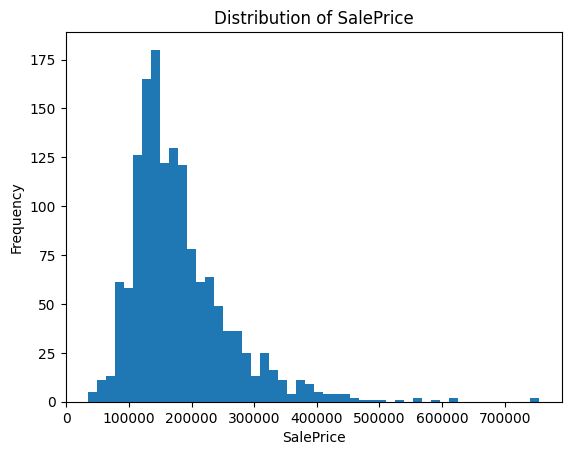

SalePrice skewness: 1.8828757597682129


In [24]:
import matplotlib.pyplot as plt

plt.hist(train['SalePrice'], bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

print("SalePrice skewness:", train['SalePrice'].skew())


Correlation Matrix (Numerical Only)

In [25]:
corr_matrix = train.corr(numeric_only=True)

print(corr_matrix['SalePrice'].sort_values(ascending=False))


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Heatmap of Top Correlated Features

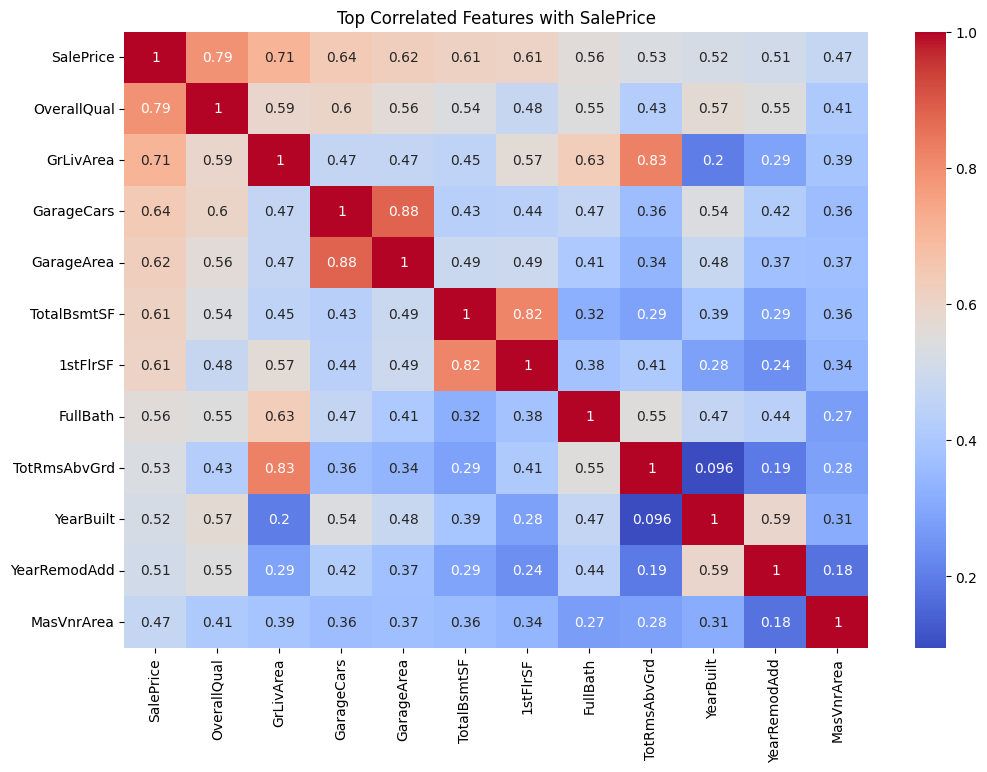

Top correlated features:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea'],
      dtype='str')


In [26]:
import seaborn as sns

top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(12).index
plt.figure(figsize=(12,8))
sns.heatmap(train[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()

print("Top correlated features:\n", top_corr)


Scatter Plot: Overall Quality vs SalePrice

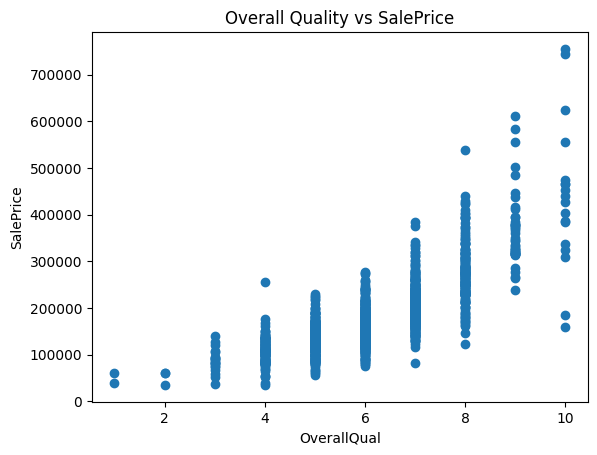

Correlation: 0.7909816005838044


In [27]:
plt.scatter(train['OverallQual'], train['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Overall Quality vs SalePrice')
plt.show()

print("Correlation:", train['OverallQual'].corr(train['SalePrice']))


Scatter Plot: GrLivArea vs SalePrice

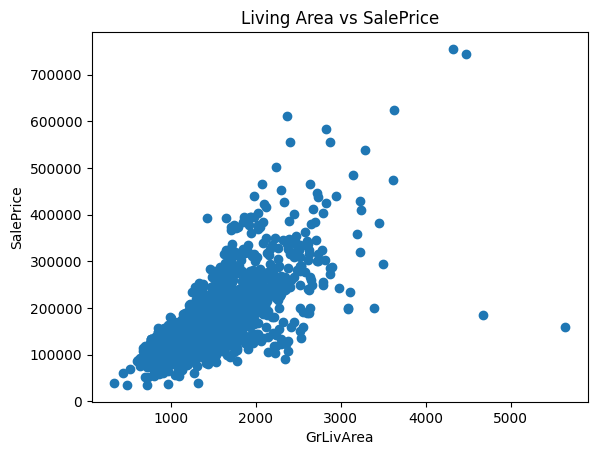

Correlation: 0.7086244776126523


In [28]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Living Area vs SalePrice')
plt.show()

print("Correlation:", train['GrLivArea'].corr(train['SalePrice']))


Boxplot: Neighborhood vs SalePrice (Categorical insight)

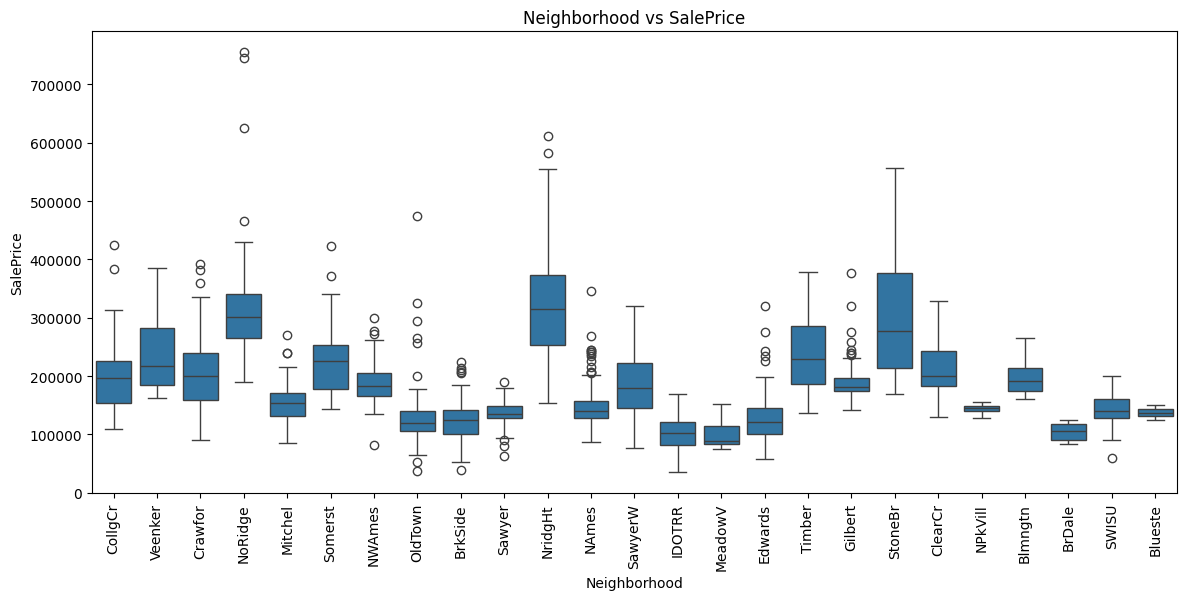

Unique neighborhoods: 25


In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xticks(rotation=90)
plt.title('Neighborhood vs SalePrice')
plt.show()

print("Unique neighborhoods:", train['Neighborhood'].nunique())


Identify Highly Correlated Predictors (Multicollinearity)

In [30]:
high_corr_pairs = []

for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row, col]) > 0.8:
            high_corr_pairs.append((row, col, corr_matrix.loc[row, col]))

print("Highly correlated feature pairs (>0.8):\n")
print(high_corr_pairs[:10])


Highly correlated feature pairs (>0.8):

[('1stFlrSF', 'TotalBsmtSF', np.float64(0.8195299750050339)), ('TotalBsmtSF', '1stFlrSF', np.float64(0.8195299750050339)), ('TotRmsAbvGrd', 'GrLivArea', np.float64(0.8254893743088424)), ('GrLivArea', 'TotRmsAbvGrd', np.float64(0.8254893743088424)), ('GarageArea', 'GarageCars', np.float64(0.8824754142814619)), ('GarageCars', 'GarageArea', np.float64(0.8824754142814619))]


##  step 4 Train / Test Split + Preprocessing + First Model

#### Separate Target from Features

In [31]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1460, 80)
y shape: (1460,)


### Train/Test Split (correct way

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (1168, 80)
Test set: (292, 80)


Identify Column Types (again, from X_train)

We do this after the split to avoid data leakage.

In [35]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print("Numerical columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))


Numerical columns: 37
Categorical columns: 43


/var/folders/62/d_mlczwx35d04t0hvsf08lkh0000gn/T/ipykernel_45973/1400283770.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X_train.select_dtypes(include=['object']).columns


Recreate Preprocessing Pipelines

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


Numerical

In [37]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


Categorical

In [38]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


Combine

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)


Build Full Pipeline With Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


Train the Model

In [41]:
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


Predict on Test Set

In [42]:
y_pred = model.predict(X_test)

print("First 10 predictions:\n", y_pred[:10])


First 10 predictions:
 [160337.5924615  343039.45068576  89978.40848629 176747.09040639
 321299.66544721  68031.24657655 239577.28198937 146831.5277266
  62710.41897056 151772.48357322]


Evaluate the Model

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 21115.361590854685
MSE: 4255318951.4368
RMSE: 65232.805791540195
R2 Score: 0.4452232100051299
